# Logistic Regression with GridSearchCV Tuning

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\etass\anaconda3\envs\class_31\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
X = selected_features
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [6]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)


# Train the Model



In [8]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_minmax, y_train)

training_score = model.score(X_train_minmax, y_train)
testing_score = model.score(X_test_minmax, y_test)

scores = cross_val_score(model, X_train_minmax, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.85


In [9]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.8506580202174328
Testing Data Score: 0.8426773455377574


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.505, total=   0.1s
[CV] C=0.001 .........................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ............................. C=0.001, score=0.506, total=   0.2s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.505, total=   0.1s
[CV] C=0.001 .........................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] ............................. C=0.001, score=0.506, total=   0.3s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.506, tot

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=3)

In [12]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8649588121002191
{'C': 10}
LogisticRegression(C=10)


In [13]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_minmax)

In [14]:
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 0.866


In [15]:
predictions = model.predict(X_test_minmax)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' 'CANDIDATE' 'CANDIDATE'
 'FALSE POSITIVE']
First 10 Actual labels: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']


In [16]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED


In [17]:
results.head(20)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
5,CONFIRMED,CONFIRMED
6,CONFIRMED,CANDIDATE
7,CANDIDATE,CANDIDATE
8,CANDIDATE,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


In [18]:
results.tail(20)

,Prediction,Actual
1728,CANDIDATE,CONFIRMED
1729,FALSE POSITIVE,FALSE POSITIVE
1730,CONFIRMED,CONFIRMED
1731,CONFIRMED,CANDIDATE
1732,FALSE POSITIVE,FALSE POSITIVE
1733,FALSE POSITIVE,FALSE POSITIVE
1734,FALSE POSITIVE,FALSE POSITIVE
1735,FALSE POSITIVE,FALSE POSITIVE
1736,FALSE POSITIVE,FALSE POSITIVE
1737,FALSE POSITIVE,FALSE POSITIVE


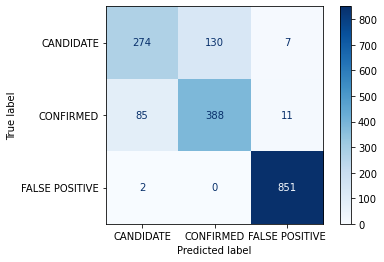

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.70      0.63      0.66       411
     CONFIRMED       0.71      0.75      0.73       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



# Save the Model

In [21]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Ezra_Tassone_LogReg.sav'
joblib.dump(model, filename)

['Ezra_Tassone_LogReg.sav']